<a href="https://colab.research.google.com/github/LuisMm16/datos_atmosfericos_python/blob/main/ERSST_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga desde la base de datos de NOAA

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/noaa.ersst.v5'
ftp.cwd(path)
filename = 'sst.mnmean.nc'
#ftp.size(filename)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
ftp.close()

# Tratamiento de datos

## Línea de tiempo

### Variación de la temperatura desde 1981

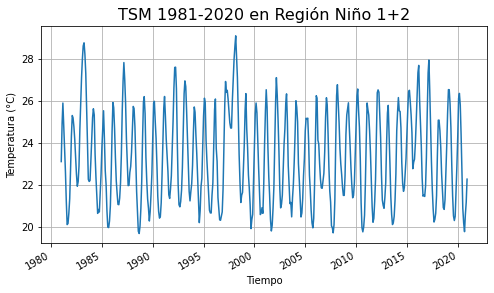

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
dset = xr.open_dataset(filename)
data_sst = dset.sst.sel(lat=slice(0,-10),lon=slice(270,280),time=slice("1981-01-01","2020-12-01"))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
data_sst.mean(dim=['lon','lat']).plot()
ax.set_title('TSM 1981-2020 en Región Niño 1+2', fontsize=16)
ax.set(xlabel='Tiempo', ylabel='Temperatura (°C)')
ax.grid(True)
#plt.savefig('LT_TSM_1981-2020_RegNino1+2',bbox_inches='tight',dpi=500)

### Anomalía de la SST en la región Niño 1+2 (1981-2010)

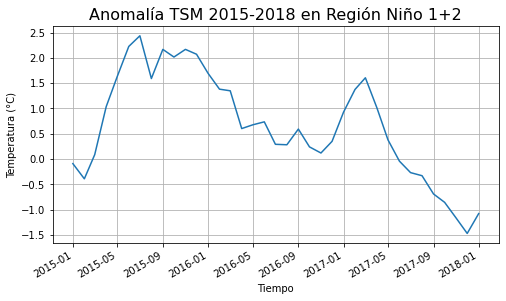

In [ ]:
date_range = pd.date_range("2015-01-01","2018-01-01",freq='MS')
array_data = pd.array(np.zeros(date_range.shape))


ni=0
for x in date_range:
  month_sel = dset.sst.sel(time=slice(("1981" + str(date_range[ni])[4:10]),
                                      "2010-12-01",12), lat=slice(0,-10), lon=slice(270,280))
  month_sel_norm = month_sel.mean(dim=['time'])
  month_sel_anom = dset.sst.sel(time=date_range[ni], lat=slice(0,-10), lon=slice(270,280)) - month_sel_norm
  array_data[ni] = month_sel_anom.mean(dim=['lon','lat']).values
  ni+=1

new_dset = xr.DataArray(data=array_data, dims=['time'], coords=dict(time=date_range))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
new_dset.plot()
ax.set_title('Anomalía TSM 2015-2018 en Región Niño 1+2', fontsize=16)
ax.set(xlabel='Tiempo', ylabel='Temperatura (°C)')
ax.grid(True)
plt.savefig('Anom_TSM2015-2018_Nino1+2',bbox_inches='tight',dpi=500)

In [ ]:
dset

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 2014)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-10-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-12-03

## Gráfica de datos mensuales

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

### Función para graficar y guardar SST mensual

In [ ]:
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs

def plot_month_sst(year,month):
  """
  plot_month_sst(year,month)
  year = 2010
  month = 3
  """
  year = str(year)
  month = str(month)
  fig_month = plt.figure(figsize=(12,5))
  ax = fig_month.add_subplot(111,projection=ccrs.PlateCarree())
  dset.sst.sel(time=(year + '-' + month + '-01')).plot(ax=ax, transform = ccrs.PlateCarree())
  #ax.add_feature(cf.BORDERS)
  ax.coastlines()
  ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
  ax.set_title(('TSM '+ year + '-' + month), fontsize=16)
  plt.savefig(('TSM '+ year + '-' + month), bbox_inches='tight', dpi=500)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

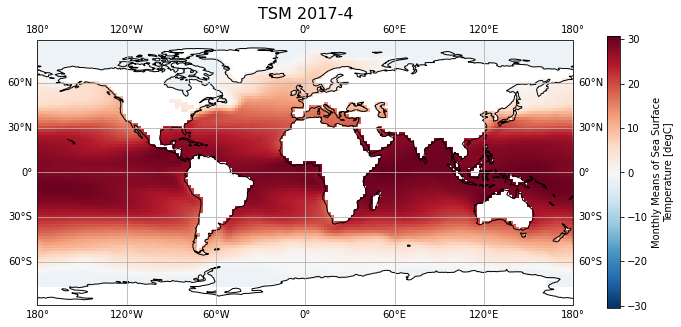

In [ ]:
plot_month_sst(2017,4)

## Cálculo de normal mensual

### Función para el cálculo

In [ ]:
def month_normal(month):
  """
  Introduce el mes en número pe 
  """
  month = str(month)
  month_sel = dset.sst.sel(time=slice(("1981-"+month+"-01"),"2010-12-01",12))
  month_normal = month_sel.mean(dim='time')
  return month_normal

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

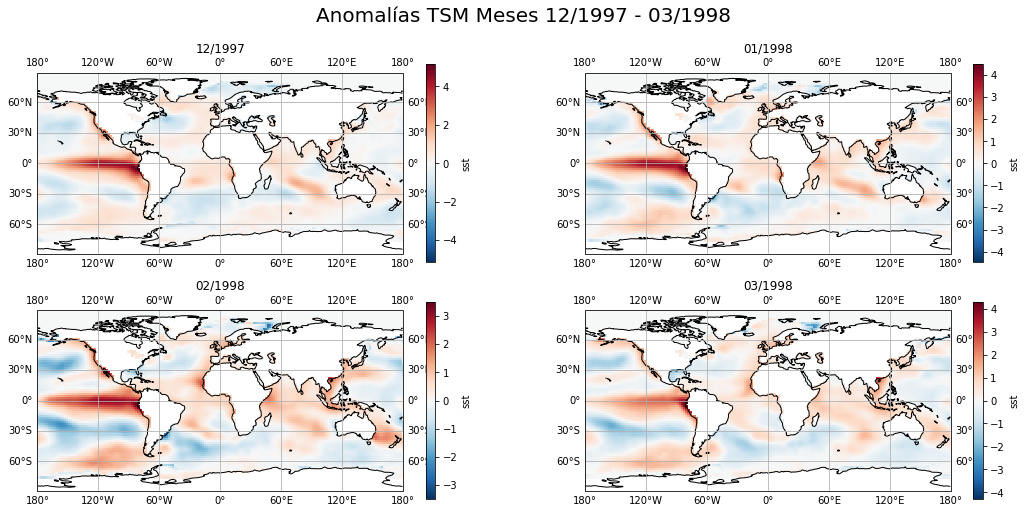

In [ ]:
dec_anom = dset.sst.sel(time="1997-12-01") - month_normal(12)
jan_anom = dset.sst.sel(time="1998-01-01") - month_normal(1)
feb_anom = dset.sst.sel(time="1998-02-01") - month_normal(2)
mar_anom = dset.sst.sel(time="1998-03-01") - month_normal(3)


fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())

dec_anom.plot(ax=ax1, transform=ccrs.PlateCarree())
jan_anom.plot(ax=ax2, transform=ccrs.PlateCarree())
feb_anom.plot(ax=ax3, transform=ccrs.PlateCarree())
mar_anom.plot(ax=ax4, transform=ccrs.PlateCarree())


ax1.set_title("12/1997")
ax2.set_title("01/1998")
ax3.set_title("02/1998")
ax4.set_title("03/1998")

ax1.set(xlabel="Longitud", ylabel='Latitud')

ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax2.coastlines()
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax3.coastlines()
ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax4.coastlines()
ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

fig.suptitle("Anomalías TSM Meses 12/1997 - 03/1998", fontsize=20)
plt.savefig('Anom_Global_DJFM1998', bbox_inches='tight', dpi=500)

## Gráfica de Hovmöller 

[Text(0, 0.5, 'Tiempo'), Text(0.5, 0, 'Longitud (°E)')]

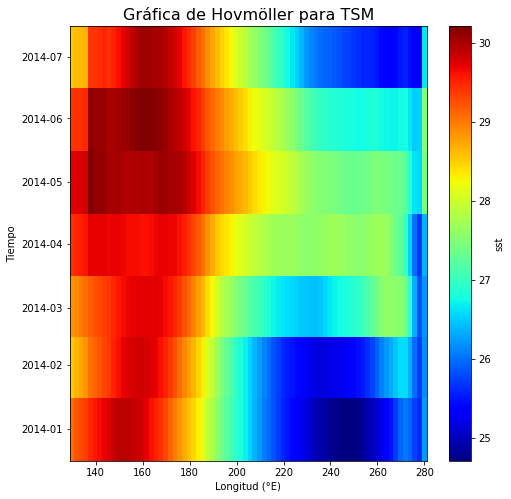

In [ ]:
data_hov = dset.sst.sel(time=slice("2014-01-01","2014-07-01"), lon = slice(130,280), lat=slice(5,-5))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
data_hov.mean(dim='lat').plot(cmap='jet')
ax.set_title("Gráfica de Hovmöller para TSM", fontsize=16)
ax.set(xlabel='Longitud (°E)', ylabel='Tiempo')
#plt.savefig("Hov_SST", bbox_inches='tight', dpi=500)

### Gráfica de Hovmöller para anomalía TSM 

In [ ]:
prueba2 = dset.sst.sel(time=slice('2014-01-01','2014-07-01'), lon = slice(130,280), lat=slice(5,-5)).mean(dim='lat')
for x in range(7):
  prueba = data_hov.sel(time=f'2014-{x+1}-01').mean(dim='lat') - month_normal(x+1).sel(lon = slice(130,280), 
                                                                               lat=slice(5,-5)).mean(dim='lat')
  prueba2[x] = prueba


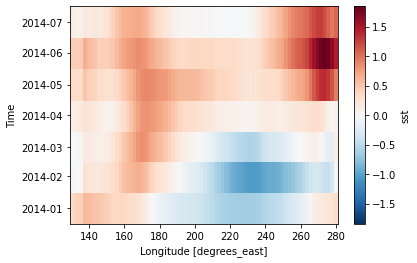

In [ ]:
prueba2.plot()

# Descarga de datos NOAA High Resolution

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/noaa.oisst.v2.highres'
ftp.cwd(path)
#ftp.nlst()

'250 Directory successfully changed.'

In [ ]:
filename1 = 'sst.day.anom.2014.v2.nc'
ftp.retrbinary("RETR " + filename1, open(filename1, 'wb').write)
filename2 = 'sst.day.anom.2015.v2.nc'
ftp.retrbinary("RETR " + filename2, open(filename2, 'wb').write)
filename3 = 'sst.day.anom.2016.v2.nc'
ftp.retrbinary("RETR " + filename3, open(filename3, 'wb').write)
filename4 = 'sst.day.anom.2017.v2.nc'
ftp.size(filename4)
ftp.retrbinary("RETR " + filename4, open(filename4, 'wb').write)
#ftp.close()

'226 Transfer complete.'

##Hovmöller High Resolution

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

dset = xr.open_dataset(filename1)
dset_sel = dset.anom.sel(time=slice("2014-01-01", "2014-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')

range_date = pd.date_range("2014-01-01","2017-12-31")
lon = dset_sel.lon
darray = xr.DataArray(data=0.0, dims=['time','lon'], coords=dict(time=range_date, lon=lon))

dset = xr.open_dataset(filename1)
dset_sel = dset.anom.sel(time=slice("2014-01-01", "2014-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x] = dset_sel[x]

dset = xr.open_dataset(filename2)
dset_sel = dset.anom.sel(time=slice("2015-01-01", "2015-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x+365] = dset_sel[x]

dset = xr.open_dataset(filename3)
dset_sel = dset.anom.sel(time=slice("2016-01-01", "2016-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(366):
  darray[x+730] = dset_sel[x]

dset = xr.open_dataset(filename4)
dset_sel = dset.anom.sel(time=slice("2017-01-01", "2017-12-31"), lon = slice(130,280), lat = slice(-5,5)).mean(dim='lat')
for x in range(365):
  darray[x+1096] = dset_sel[x]

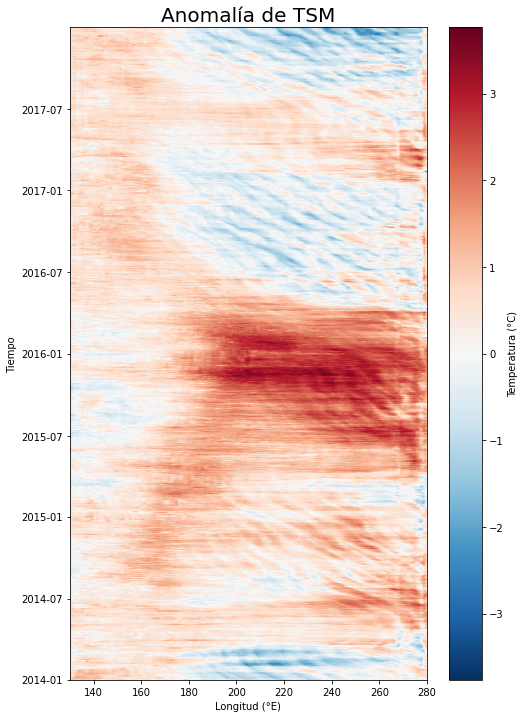

In [ ]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
im = darray.plot(ax=ax, add_colorbar = False)
ax.set_title("Anomalía de TSM", fontsize=20)
ax.set(xlabel="Longitud (°E)", ylabel="Tiempo")
cb = plt.colorbar(im)
cb.set_label('Temperatura (°C)')
plt.savefig("Anom_TSM_Hov", bbox_inches='tight', dpi=500)